In [2]:
import pandas as pd
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse

import statsmodels.api as SM_API
import statsmodels.formula.api as SM_Formula
import statsmodels.graphics as smgraphics

In [3]:
path = '../data/CCPP/Folds5x2_pp.xlsx'

df = pd.read_excel(path)
df.columns = ['T', 'V', 'AP', 'RH', 'EP']
df

,T,V,AP,RH,EP
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90
...,...,...,...,...,...
9563,16.65,49.69,1014.01,91.00,460.03
9564,13.19,39.18,1023.67,66.78,469.62
9565,31.32,74.33,1012.92,36.48,429.57
9566,24.48,69.45,1013.86,62.39,435.74


bi)

FINDINGS: 
T and EP are negatively correlated.
T and V are positively correlated.
V and EP are negatively correlated.


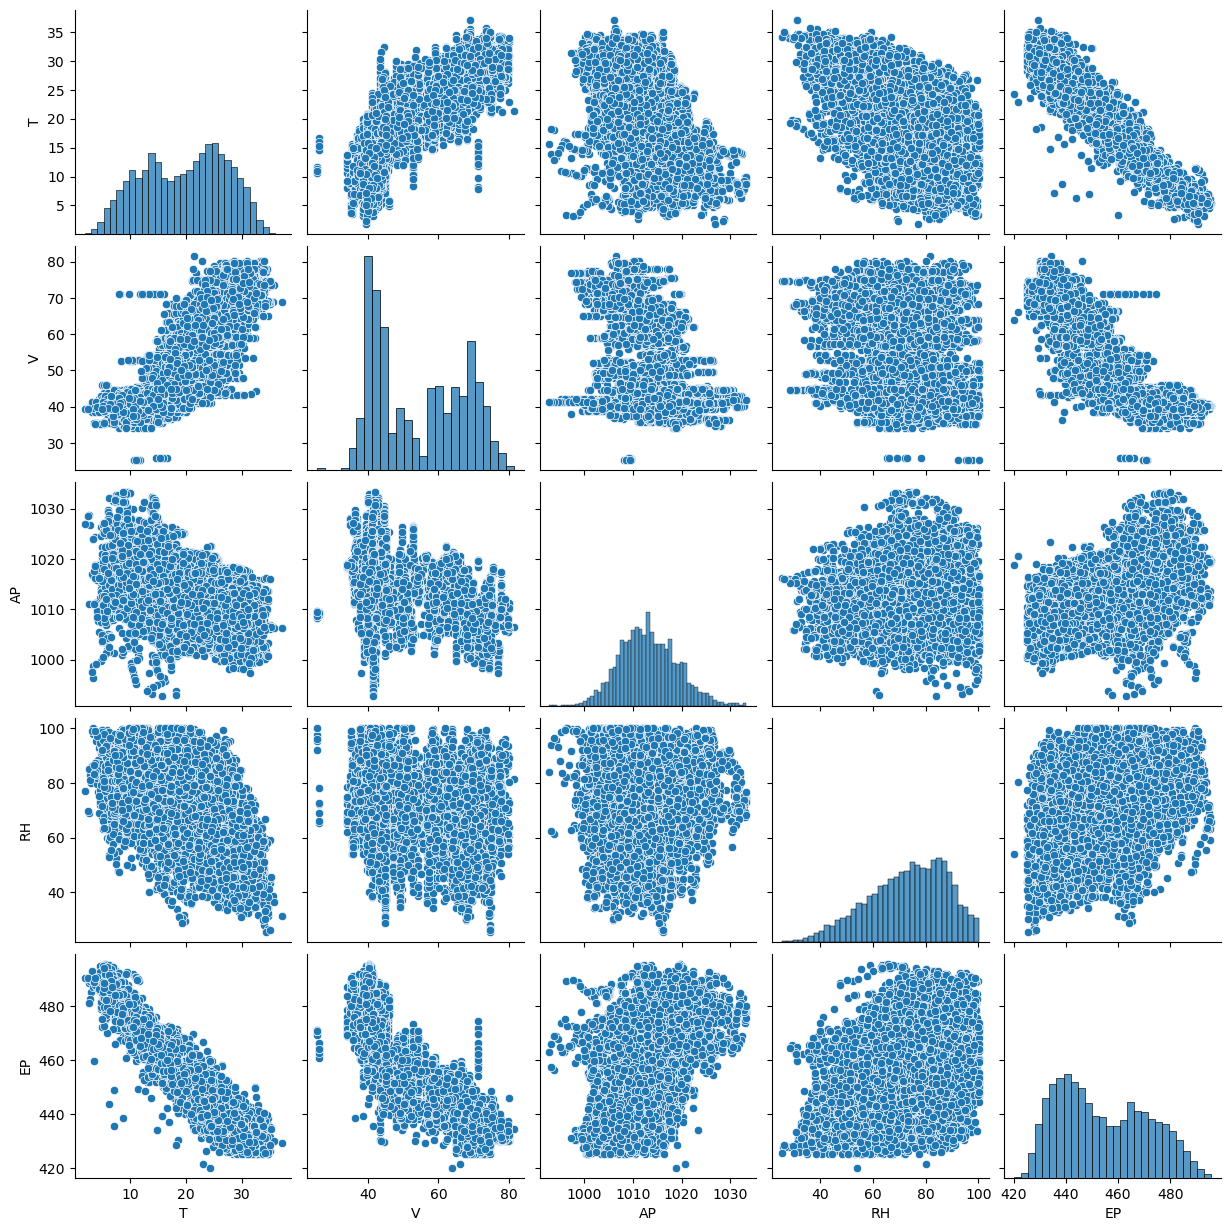

In [4]:
#bii)

sb.pairplot(df)

print("FINDINGS: ")
print('T and EP are negatively correlated.')
print('T and V are positively correlated.')
print('V and EP are negatively correlated.')


In [20]:
#biii)
table = {}

for column in df.columns:
    np_arr = df[column].to_numpy()
    mean = np.mean(np_arr)
    median = np.median(np_arr)
    _range = np.max(np_arr) - np.min(np_arr)
    Q1 = np.quantile(np_arr, 0.25)
    Q3 = np.quantile(np_arr, 0.75)
    IQR = Q3 - Q1

    table[column] = {
        'mean' : round(mean,2),
        'median': round(median,2),
        'range': round(_range,2),
        '1st quartile': round(Q1,2),
        '3rd quartile': round(Q3,2),
        'Inter-quartile range': round(IQR,2)}

table

{'T': {'mean': 19.65,
  'median': 20.34,
  'range': 35.3,
  '1st quartile': 13.51,
  '3rd quartile': 25.72,
  'Inter-quartile range': 12.21},
 'V': {'mean': 54.31,
  'median': 52.08,
  'range': 56.2,
  '1st quartile': 41.74,
  '3rd quartile': 66.54,
  'Inter-quartile range': 24.8},
 'AP': {'mean': 1013.26,
  'median': 1012.94,
  'range': 40.41,
  '1st quartile': 1009.1,
  '3rd quartile': 1017.26,
  'Inter-quartile range': 8.16},
 'RH': {'mean': 73.31,
  'median': 74.97,
  'range': 74.6,
  '1st quartile': 63.33,
  '3rd quartile': 84.83,
  'Inter-quartile range': 21.5},
 'EP': {'mean': 454.37,
  'median': 451.55,
  'range': 75.5,
  '1st quartile': 439.75,
  '3rd quartile': 468.43,
  'Inter-quartile range': 28.68}}

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                 8.510e+04
Date:                Fri, 22 Sep 2023   Prob (F-statistic):               0.00
Time:                        09:09:42   Log-Likelihood:                -29756.
No. Observations:                9568   AIC:                         5.952e+04
Df Residuals:                    9566   BIC:                         5.953e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        497.0341      0.156   3177.280      0.0

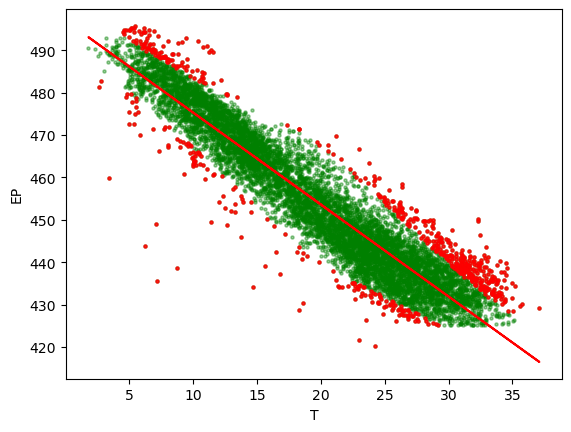

In [8]:
#c, Temperature
X = df['T'].to_numpy()
Y = df['EP'].to_numpy()
outlier_x, outlier_y = [], []

y_intercept = SM_API.add_constant(X)
T_SLR_Model = SM_API.OLS(Y, y_intercept).fit()
print(T_SLR_Model.summary())

influence = T_SLR_Model.get_influence()
cooks_distance = influence.cooks_distance
avg_cooks_distance = np.mean(cooks_distance[0])

for i in range(len(cooks_distance[0])):
    if cooks_distance[0][i] > 3*avg_cooks_distance:
        outlier_x.append(X[i])
        outlier_y.append(Y[i])

y_pred = T_SLR_Model.predict(y_intercept)

plt.scatter(X, Y, color="green", s=5, alpha=0.4)
plt.scatter(outlier_x, outlier_y, color="red", s=5, alpha=0.8, label='outliers')
plt.plot(X, y_pred, color="red")
plt.xlabel('T')
plt.ylabel('EP')
plt.show()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.269
Model:                            OLS   Adj. R-squared:                  0.269
Method:                 Least Squares   F-statistic:                     3516.
Date:                Fri, 22 Sep 2023   Prob (F-statistic):               0.00
Time:                        09:11:12   Log-Likelihood:                -39224.
No. Observations:                9568   AIC:                         7.845e+04
Df Residuals:                    9566   BIC:                         7.847e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1055.2610     25.459    -41.449      0.0

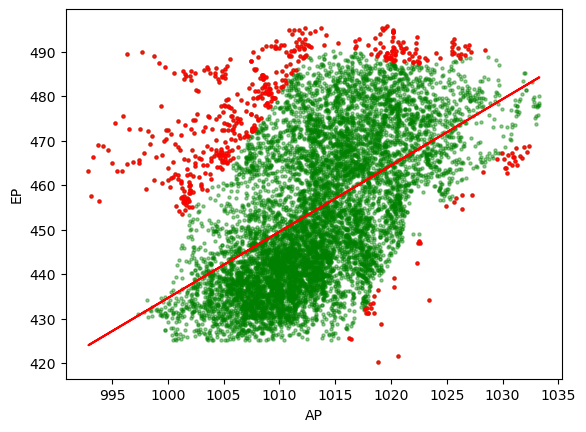

In [10]:
#c, Ambient Pressure
X = df['AP'].to_numpy()
outlier_x, outlier_y = [], []

y_intercept = SM_API.add_constant(X)
AP_SLR_Model = SM_API.OLS(Y, y_intercept).fit()
print(AP_SLR_Model.summary())

influence = AP_SLR_Model.get_influence()
cooks_distance = influence.cooks_distance
avg_cooks_distance = np.mean(cooks_distance[0])

for i in range(len(cooks_distance[0])):
    if cooks_distance[0][i] > 3*avg_cooks_distance:
        outlier_x.append(X[i])
        outlier_y.append(Y[i])

y_pred = AP_SLR_Model.predict(y_intercept)

plt.scatter(X, Y, color="green", s=5, alpha=0.4)
plt.scatter(outlier_x, outlier_y, color="red", s=5, alpha=0.8, label='outliers')
plt.plot(X, y_pred, color="red")
plt.xlabel('AP')
plt.ylabel('EP')
plt.show()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                 2.972e+04
Date:                Fri, 22 Sep 2023   Prob (F-statistic):               0.00
Time:                        09:12:39   Log-Likelihood:                -33963.
No. Observations:                9568   AIC:                         6.793e+04
Df Residuals:                    9566   BIC:                         6.794e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        517.8015      0.378   1370.218      0.0

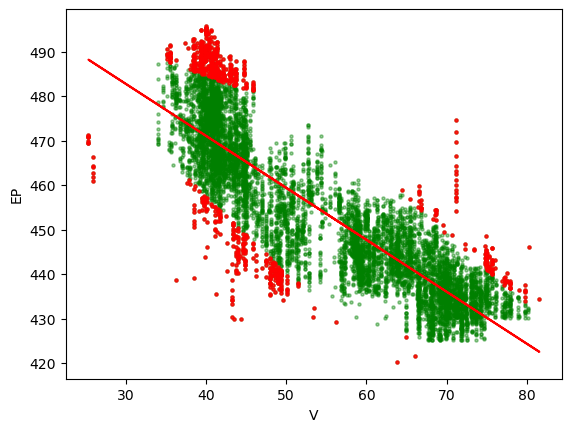

In [11]:
#c, Exhaust Vaccum
X = df['V'].to_numpy()
outlier_x, outlier_y = [], []

y_intercept = SM_API.add_constant(X)
V_SLR_Model = SM_API.OLS(Y, y_intercept).fit()
print(V_SLR_Model.summary())

influence = V_SLR_Model.get_influence()
cooks_distance = influence.cooks_distance
avg_cooks_distance = np.mean(cooks_distance[0])

for i in range(len(cooks_distance[0])):
    if cooks_distance[0][i] > 3*avg_cooks_distance:
        outlier_x.append(X[i])
        outlier_y.append(Y[i])

y_pred = V_SLR_Model.predict(y_intercept)

plt.scatter(X, Y, color="green", s=5, alpha=0.4)
plt.scatter(outlier_x, outlier_y, color="red", s=5, alpha=0.8, label='outliers')
plt.plot(X, y_pred, color="red")
plt.xlabel('V')
plt.ylabel('EP')
plt.show()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     1714.
Date:                Fri, 22 Sep 2023   Prob (F-statistic):               0.00
Time:                        09:12:43   Log-Likelihood:                -39933.
No. Observations:                9568   AIC:                         7.987e+04
Df Residuals:                    9566   BIC:                         7.988e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        420.9618      0.823    511.676      0.0

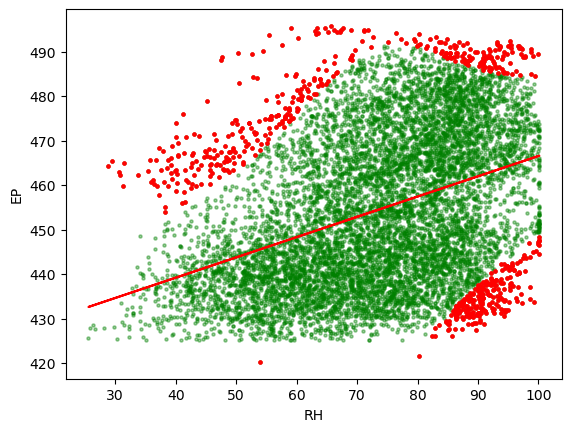

In [12]:
#c, Relative Humidity
X = df['RH'].to_numpy()
outlier_x, outlier_y = [], []

y_intercept = SM_API.add_constant(X)
RH_SLR_Model = SM_API.OLS(Y, y_intercept).fit()
print(RH_SLR_Model.summary())

influence = RH_SLR_Model.get_influence()
cooks_distance = influence.cooks_distance
avg_cooks_distance = np.mean(cooks_distance[0])

for i in range(len(cooks_distance[0])):
    if cooks_distance[0][i] > 3*avg_cooks_distance:
        outlier_x.append(X[i])
        outlier_y.append(Y[i])

y_pred = RH_SLR_Model.predict(y_intercept)

plt.scatter(X, Y, color="green", s=5, alpha=0.4)
plt.scatter(outlier_x, outlier_y, color="red", s=5, alpha=0.8, label='outliers')
plt.scatter(outlier_x, outlier_y, color="red", s=5, alpha=0.8, label='outliers')
plt.plot(X, y_pred, color="red")
plt.xlabel('RH')
plt.ylabel('EP')
plt.show()

In [32]:
#d
X_multiple = df.loc[:, 'T':'RH'].to_numpy()
y_intercept = SM_API.add_constant(X_multiple)

MLR_Model = SM_API.OLS(Y, y_intercept).fit()
print(MLR_Model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 3.114e+04
Date:                Fri, 22 Sep 2023   Prob (F-statistic):               0.00
Time:                        14:58:14   Log-Likelihood:                -28088.
No. Observations:                9568   AIC:                         5.619e+04
Df Residuals:                    9563   BIC:                         5.622e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        454.6093      9.749     46.634      0.0

All predictors have a p-value < 0.05, so we can reject null hypothesis for all the predictors!!

[-2.171319958517799, 1.4898716733991115, -1.1681351265557134, 0.45565010226298047]
[-1.9775131066353997, 0.062082943780857325, -0.23391642258249778, -0.15805410291641356]


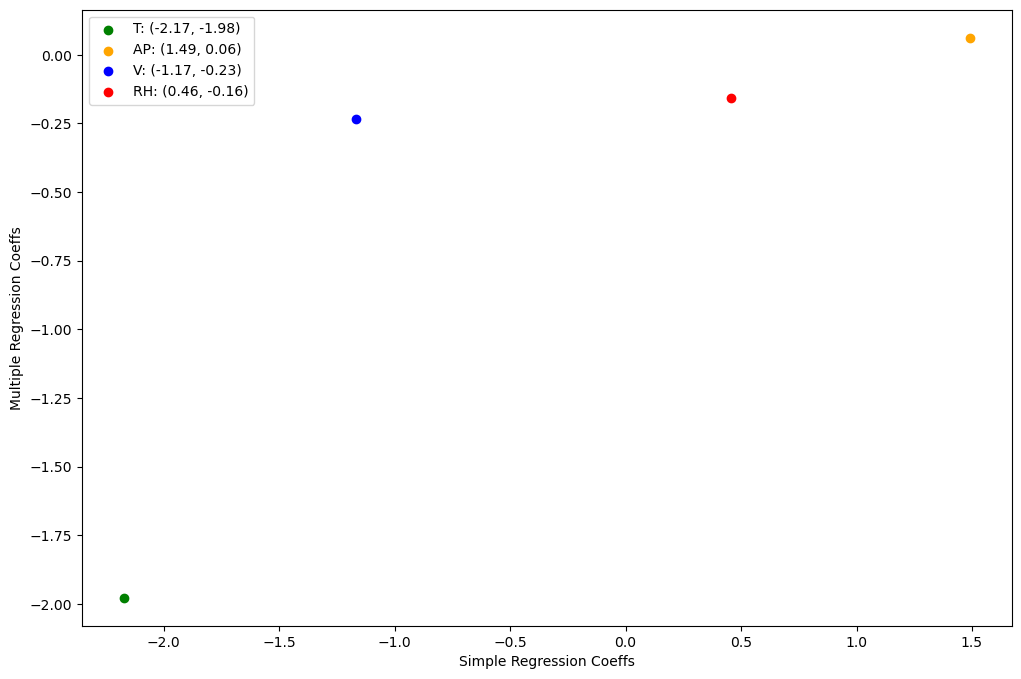

In [30]:
#e
SLR_coeffs = []
SLR_coeffs.append(T_SLR_Model.params[1])
SLR_coeffs.append(AP_SLR_Model.params[1])
SLR_coeffs.append(V_SLR_Model.params[1])
SLR_coeffs.append(RH_SLR_Model.params[1])

MLR_coeffs = []
MLR_coeffs.append(MLR_Model.params[1])
MLR_coeffs.append(MLR_Model.params[3])
MLR_coeffs.append(MLR_Model.params[2])
MLR_coeffs.append(MLR_Model.params[4])

print(SLR_coeffs)
print(MLR_coeffs)

fig, axes = plt.subplots(figsize=(12,8))
axes.scatter(SLR_coeffs[0], MLR_coeffs[0], color="green", label='T: (' + str(round(SLR_coeffs[0],2)) + ', '+ str(round(MLR_coeffs[0],2)) + ')')
axes.scatter(SLR_coeffs[1], MLR_coeffs[1], color="orange", label='AP: (' + str(round(SLR_coeffs[1],2)) + ', '+ str(round(MLR_coeffs[1],2)) + ')')
axes.scatter(SLR_coeffs[2], MLR_coeffs[2], color="blue", label='V: (' + str(round(SLR_coeffs[2],2)) + ', '+ str(round(MLR_coeffs[2],2)) + ')')
axes.scatter(SLR_coeffs[3], MLR_coeffs[3], color="red", label='RH: (' + str(round(SLR_coeffs[3],2)) + ', '+ str(round(MLR_coeffs[3],2)) + ')')
plt.xlabel('Simple Regression Coeffs')
plt.ylabel('Multiple Regression Coeffs')
plt.legend()
plt.show()


OBSERVATIONS: For predictor 'RH' coefficient changes from positive to negative, so the correlation becomes inverse betweem 'RH' and 'EP'

(9568, 1)
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                 3.299e+04
Date:                Thu, 21 Sep 2023   Prob (F-statistic):               0.00
Time:                        12:55:42   Log-Likelihood:                -29101.
No. Observations:                9568   AIC:                         5.821e+04
Df Residuals:                    9564   BIC:                         5.824e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        492.7281      0.673    732.24

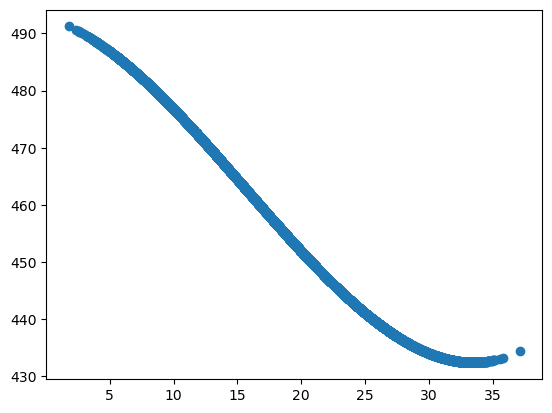

In [70]:
X = df['T'].to_numpy().reshape(-1, 1)
Y = df['EP'].to_numpy().reshape(-1, 1)

print(Y.shape)

polynomial_features = PolynomialFeatures(degree=3)
X_p = polynomial_features.fit_transform(X)

LR_Model = SM_API.OLS(Y, X_p).fit()
y_pred = LR_Model.predict(X_p).reshape(-1,1)

print(LR_Model.summary())

plt.scatter(X, y_pred)

(9568, 1)
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.275
Model:                            OLS   Adj. R-squared:                  0.275
Method:                 Least Squares   F-statistic:                     1813.
Date:                Thu, 21 Sep 2023   Prob (F-statistic):               0.00
Time:                        13:04:05   Log-Likelihood:                -39184.
No. Observations:                9568   AIC:                         7.837e+04
Df Residuals:                    9565   BIC:                         7.840e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0747      0.009      8.41

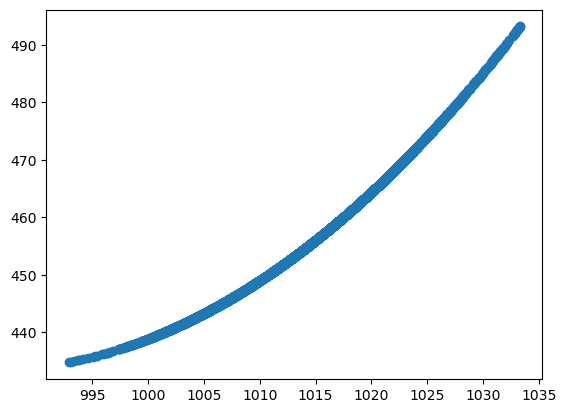

In [72]:
X = df['AP'].to_numpy().reshape(-1, 1)
Y = df['EP'].to_numpy().reshape(-1, 1)

print(Y.shape)

polynomial_features = PolynomialFeatures(degree=3)
X_p = polynomial_features.fit_transform(X)

LR_Model = SM_API.OLS(Y, X_p).fit()
print(LR_Model.summary())

#plt.scatter(X, Y)
plt.scatter(X, LR_Model.predict(X_p))
plt.show()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.154
Model:                            OLS   Adj. R-squared:                  0.153
Method:                 Least Squares   F-statistic:                     579.2
Date:                Thu, 21 Sep 2023   Prob (F-statistic):               0.00
Time:                        13:04:54   Log-Likelihood:                -39923.
No. Observations:                9568   AIC:                         7.985e+04
Df Residuals:                    9564   BIC:                         7.988e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        468.4135     10.545     44.422      0.0

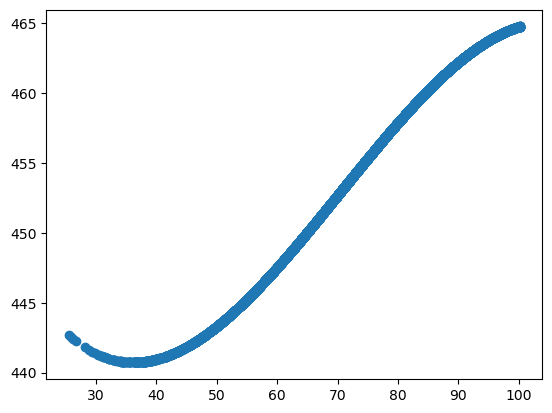

In [73]:
X = df['RH'].to_numpy().reshape(-1, 1)

polynomial_features = PolynomialFeatures(degree=3)
X_p = polynomial_features.fit_transform(X)

LR_Model = SM_API.OLS(Y, X_p).fit()
print(LR_Model.summary())

plt.scatter(X, LR_Model.predict(X_p))
plt.show()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                 1.098e+04
Date:                Thu, 21 Sep 2023   Prob (F-statistic):               0.00
Time:                        13:05:21   Log-Likelihood:                -33585.
No. Observations:                9568   AIC:                         6.718e+04
Df Residuals:                    9564   BIC:                         6.721e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        554.1468      9.151     60.557      0.0

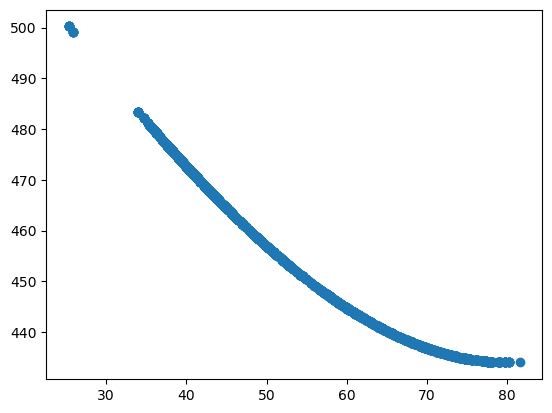

In [74]:
X = df['V'].to_numpy().reshape(-1, 1)

polynomial_features = PolynomialFeatures(degree=3)
X_p = polynomial_features.fit_transform(X)

LR_Model = SM_API.OLS(Y, X_p).fit()
print(LR_Model.summary())

#plt.scatter(X, Y)
plt.scatter(X, LR_Model.predict(X_p))
plt.show()


Since p-value for x^2 of feature Exhaust Vacuum(V) > 0.05 and x^3 is also significantly large, we cannot reject null hypothesis and there is no non-linear association among predictor and response variables. 

For Temperature(T), Ambient Pressure(AP) and Relative Humidity(RH); p-values of x^2 and x^3 are < 0.05. Therefore, we can reject the null hypothesis. Which would imply that there is some non-linear association among these predictors and response variable.

In [84]:
interactionModel = SM_Formula.ols(formula='EP ~ T + AP + RH + V + T*AP + T*RH + T*V + AP*RH + AP*V + RH*V', data=df).fit()

print(interactionModel.summary())

                            OLS Regression Results                            
Dep. Variable:                     EP   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                 1.405e+04
Date:                Thu, 21 Sep 2023   Prob (F-statistic):               0.00
Time:                        14:08:29   Log-Likelihood:                -27548.
No. Observations:                9568   AIC:                         5.512e+04
Df Residuals:                    9557   BIC:                         5.520e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    685.7825     78.640      8.721      0.0

AP, RH, V, T:RH, T:V, AP:RH, AP:V have p-value < 0.05. So, we can reject null hypothesis. These variables are significat statistically.

T, T:AP, RH:V have p-value > 0.05. So, here we cannot reject null hypothesis. Thus, these variables are not significant statistically.

In short, there is evidence of association between interaction of predictor variables and response variable.

In [14]:
#h
def model_train(Train, Test, formula):
    LR_Model = SM_Formula.ols(formula=formula, data=Train).fit()
    print(LR_Model.summary())
    return LR_Model
    
def model_mse(LR_Model, X_train, Y_train, X_test, Y_test):
    y_pred_train = LR_Model.predict(X_train)
    y_pred_test = LR_Model.predict(X_test)
    
    train_mse = mse(Y_train, y_pred_train)
    test_mse = mse(Y_test, y_pred_test)
    
    return {'Train_mse': round(train_mse,2), 'Test_mse': round(test_mse,2)}
    

In [16]:
#ALL LINEAR VARIABLES
mse_table = {}
print('ALL LINEAR VARIABLES; LR Model')

train, test = train_test_split(df, test_size=0.3)

#define formula
SIMPLE_VARIABLES_FORMULA = 'EP ~ T + V + AP + RH'

#TRAIN MODEL
LR_model = model_train(train, test, SIMPLE_VARIABLES_FORMULA)

#GET MSE
mse_table['LINEAR REGRESSION: ALL LINEAR VARIABLES'] = model_mse(LR_model, train.loc[:, 'T':'RH'], train['EP'], test.loc[:, 'T':'RH'], test['EP'])



ALL LINEAR VARIABLES; LR Model
                            OLS Regression Results                            
Dep. Variable:                     EP   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                 2.236e+04
Date:                Fri, 22 Sep 2023   Prob (F-statistic):               0.00
Time:                        09:17:36   Log-Likelihood:                -19576.
No. Observations:                6697   AIC:                         3.916e+04
Df Residuals:                    6692   BIC:                         3.920e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    457.2688

In [18]:
#ALL QUADRATIC & INTERATION VARIABLES
print('ALL QUADRATIC & INTERATION VARIABLES; LR Model')

#define formula
#SIMPLE_VARIABLES_FORMULA = 'EP ~ T + V + AP + RH + T*T + V*V + AP*AP + RH*RH + T*V + T*AP + T*RH + V*AP + V*RH + AP*RH'
SIMPLE_VARIABLES_FORMULA = 'EP ~ T + V + AP + RH + np.power(T,2) + np.power(V,2) + np.power(AP,2) + np.power(RH,2) + AP*AP + RH*RH + T*V + T*AP + T*RH + V*AP + V*RH + AP*RH'

#TRAIN MODEL
LR_model = model_train(train, test, SIMPLE_VARIABLES_FORMULA)

#GET MSE
mse_table['LINEAR REGRESSION: ALL QUADRATIC & INTERATION VARIABLES'] = model_mse(LR_model, train.loc[:, 'T':'RH'], train['EP'], test.loc[:, 'T':'RH'], test['EP'])


ALL QUADRATIC & INTERATION VARIABLES; LR Model
                            OLS Regression Results                            
Dep. Variable:                     EP   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                     7378.
Date:                Fri, 22 Sep 2023   Prob (F-statistic):               0.00
Time:                        09:18:20   Log-Likelihood:                -19120.
No. Observations:                6697   AIC:                         3.827e+04
Df Residuals:                    6682   BIC:                         3.837e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------

In [19]:
#ALL QUADRATIC & INTERATION VARIABLES
print('ONLY SIGNIFICANT QUADRATIC & INTERATION VARIABLES; LR Model')

#define formula
SIMPLE_VARIABLES_FORMULA = 'EP ~ T + V + AP + RH + np.power(T,2) + np.power(AP,2) + np.power(RH,2) + AP*AP + RH*RH + T*V + T*RH + V*AP + AP*RH'

#TRAIN MODEL
LR_model = model_train(train, test, SIMPLE_VARIABLES_FORMULA)

#GET MSE
mse_table['LINEAR REFGRESSION: ONLY SIGNIFICANT QUADRATIC & INTERATION VARIABLES'] = model_mse(LR_model, train.loc[:, 'T':'RH'], train['EP'], test.loc[:, 'T':'RH'], test['EP'])


ONLY SIGNIFICANT QUADRATIC & INTERATION VARIABLES; LR Model
                            OLS Regression Results                            
Dep. Variable:                     EP   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                     9387.
Date:                Fri, 22 Sep 2023   Prob (F-statistic):               0.00
Time:                        09:18:50   Log-Likelihood:                -19122.
No. Observations:                6697   AIC:                         3.827e+04
Df Residuals:                    6685   BIC:                         3.835e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------

Train MSE: 10.04
Test MSE: 16.6
Best fit K: 5


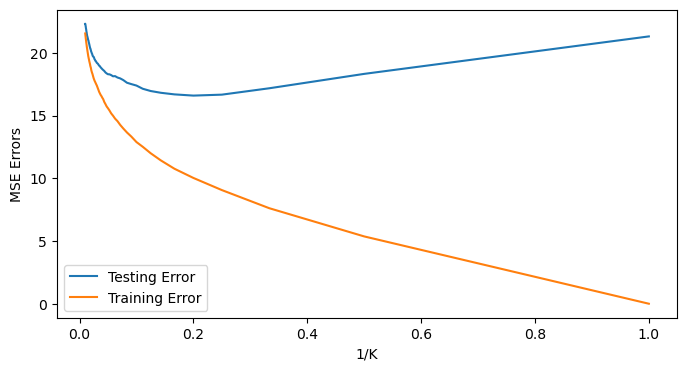

In [20]:
#i
#RAW FEATURES
trainError, testError, inv_k_values = [], [], []
train_mse, test_mse = float('inf'), float('inf')
optK = -1

X_train = np.array(train.loc[:, 'T':'RH'])
Y_train = np.array(train['EP']).reshape(-1, 1)
X_test = np.array(test.loc[:, 'T':'RH'])
Y_test = np.array(test['EP']).reshape(-1, 1)

for k in range(1, 101):
    
    inv_k_values.append(1/k)
    
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, Y_train)
    
    y_pred_train = knn.predict(X_train)
    y_pred_test = knn.predict(X_test)
    
    temp_train_mse = mse(Y_train, y_pred_train)
    trainError.append(temp_train_mse)
    
    temp_test_mse = mse(Y_test, y_pred_test)
    testError.append(temp_test_mse)
        
    if temp_test_mse < test_mse:
        test_mse = temp_test_mse
        train_mse = temp_train_mse
        optK = k
    
print("Train MSE: " + str(round(train_mse, 2)))
print("Test MSE: " + str(round(test_mse, 2)))
print("Best fit K: " + str(round(optK, 2)))

plt.figure(figsize=(8,4))
plt.plot(inv_k_values, testError, label="Testing Error")
plt.plot(inv_k_values, trainError, label="Training Error")
plt.gca().set_xlabel("1/K")
plt.gca().set_ylabel("MSE Errors")
plt.gca().legend()
plt.show()

mse_table['KNN: RAW FEATURES'] = {'Train_mse': round(train_mse,2), 'Test_mse': round(test_mse,2)}

Train MSE: 13.6
Test MSE: 19.24
Best fit K: 18


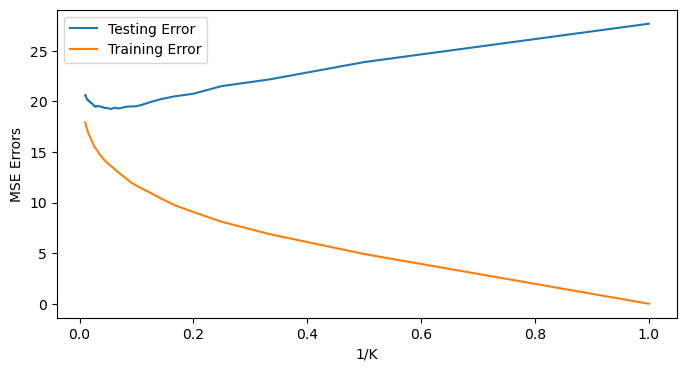

In [31]:
#Normalize within [0,1]

trainError, testError, inv_k_values = [], [], []
train_mse, test_mse = float('inf'), float('inf')
optK = -1

min_max_Scaler = preprocessing.MinMaxScaler()

X_train = np.array(train.loc[:, 'T':'RH'])
Y_train = np.array(train['EP']).reshape(-1, 1)
X_test = np.array(test.loc[:, 'T':'RH'])
Y_test = np.array(test['EP']).reshape(-1, 1)

X_train_normal = min_max_Scaler.fit_transform(X_train)
X_test_normal = min_max_Scaler.fit_transform(X_test)

for k in range(1, 101):
    
    inv_k_values.append(1/k)
    
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train_normal, Y_train)
    
    y_pred_train = knn.predict(X_train_normal)
    y_pred_test = knn.predict(X_test_normal)
    
    temp_train_mse = mse(Y_train, y_pred_train)
    trainError.append(temp_train_mse)
    
    temp_test_mse = mse(Y_test, y_pred_test)
    testError.append(temp_test_mse)
        
    if temp_test_mse < test_mse:
        test_mse = temp_test_mse
        train_mse = temp_train_mse
        optK = k
    
print("Train MSE: " + str(round(train_mse, 2)))
print("Test MSE: " + str(round(test_mse, 2)))
print("Best fit K: " + str(round(optK, 2)))

plt.figure(figsize=(8,4))
plt.plot(inv_k_values, testError, label="Testing Error")
plt.plot(inv_k_values, trainError, label="Training Error")
plt.gca().set_xlabel("1/K")
plt.gca().set_ylabel("MSE Errors")
plt.gca().legend()
plt.show()

mse_table['KNN: NORMALIZED FEATURES'] = {'Train_mse': round(train_mse,2), 'Test_mse': round(test_mse,2)}

In [28]:
#j
print('OBSERVATIONS: KNN performs better than all above regression methods!!')
pd.DataFrame(data=mse_table.items(), columns=['Method','Error'])

OBSERVATIONS: KNN performs better than all above regression methods!!


,Method,Error
0,LINEAR REGRESSION: ALL LINEAR VARIABLES,"{'Train_mse': 20.25, 'Test_mse': 21.99}"
1,LINEAR REGRESSION: ALL QUADRATIC & INTERATION ...,"{'Train_mse': 17.68, 'Test_mse': 19.14}"
2,LINEAR REFGRESSION: ONLY SIGNIFICANT QUADRATIC...,"{'Train_mse': 17.69, 'Test_mse': 19.13}"
3,KNN: RAW FEATURES,"{'Train_mse': 10.04, 'Test_mse': 16.6}"
4,KNN: NORMALIZED FEATURES,"{'Train_mse': 13.6, 'Test_mse': 19.24}"


#References
https://ostwalprasad.github.io/machine-learning/Polynomial-Regression-using-statsmodel.html
https://michael-fuchs-python.netlify.app/2019/07/02/statsmodel-formula-api-vs-statsmodel-api/
https://rforhr.com/polynomialregression.html